## Exercise 1.1

In this exercise we will use the Amazon sentiment analysis data (Blitzer et al., 2007), where the goal is to classify text documents as expressing a positive or negative sentiment (i.e., a classification problem with two classes). We are going to focus on book reviews. To load the data, type:

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lxmls.readers.sentiment_reader as srs
scr = srs.SentimentCorpus("books")

This will load the data in a bag-of-words representation where rare words (occurring less than 5 times in the training data) are removed.

1. Implement the Naive Bayes algorithm. Open the file `multinomial_naive_bayes.py`,  which is inside the classifiers folder. In the MultinomialNaiveBayes class you will find the train method. We have already placed some code in that file to help you get started.
    
2. After implementing, run Naive Bayes with the multinomial model on the Amazon dataset (sentiment classification) and report results both for training and testing

In [3]:
import lxmls.classifiers.multinomial_naive_bayes as mnbb
mnb = mnbb.MultinomialNaiveBayes()
params_nb_sc = mnb.train(scr.train_X,scr.train_y)
y_pred_train = mnb.test(scr.train_X,params_nb_sc)
acc_train = mnb.evaluate(scr.train_y, y_pred_train)
y_pred_test = mnb.test(scr.test_X,params_nb_sc)
acc_test = mnb.evaluate(scr.test_y, y_pred_test)
print("Multinomial Naive Bayes Amazon Sentiment Accuracy train: %f test: %f"%(acc_train,acc_test))

# Multinomial Naive Bayes Amazon Sentiment Accuracy train: 0.987500 test: 0.635000

Multinomial Naive Bayes Amazon Sentiment Accuracy train: 0.987500 test: 0.635000


c:\users\thoma\documents\inria\lxmls-toolkit\lxmls\classifiers\multinomial_naive_bayes.py:63: RuntimeWarning: divide by zero encountered in log
  params[1:, i] = np.nan_to_num(np.log(likelihood[:, i]))


Observe that words that were not observed at training time cause problems at testtime. Why? To  solve this problem, apply a simple add-one smoothing technique:  replace the expression in Eq. 1.9 for the estimation of the conditional probabilities by
    
${\hat P}(w_j|c_k) = \frac{1+\sum_ {m \in \mathcal{I}_k} n_j(x^m)}{J + \sum_{i=1}^J \sum_ {m\in \mathcal{I}_k} n_i(x^m)}.$

where $J$ is the number of distinct words. This is a widely used smoothing strategy which has a Bayesian interpretation: it corresponds to choosing a uniform prior for the word distribution on both classes, and to replace the maximum likelihood criterion by a maximum a posteriori approach. This is a form of regularization, preventing the model from overfitting on the training data. See e.g. for more information. Report the new accuracies.

In [4]:
# Multinomial Naive Bayes Amazon Sentiment Accuracy train: 0.971875 test: 0.842500

## Exercise 1.2

We provide an implementation of the perceptron algorithm in the class Perceptron
(file `perceptron.py`).

Run the following commands to generate a simple dataset

In [5]:
%matplotlib inline
import lxmls.readers.simple_data_set as sds
sd = sds.SimpleDataSet(
    nr_examples=100,
    g1=[[-1,-1],1], 
    g2=[[1,1],1], 
    balance=0.5,
    split=[0.5,0,0.5]
)

Run the perceptron algorithm on the simple dataset previously generated and report its train and test set accuracy:

In [6]:
import lxmls.classifiers.perceptron as percc

def run_classifier(sd, classifier):   
    params_classifier = classifier.train(sd.train_X,sd.train_y)
    y_pred_train = classifier.test(sd.train_X,params_classifier)
    acc_train = classifier.evaluate(sd.train_y, y_pred_train)
    y_pred_test = classifier.test(sd.test_X,params_classifier)
    acc_test = classifier.evaluate(sd.test_y, y_pred_test)
    return (acc_train, acc_test, params_classifier)
    
perc = percc.Perceptron()
acc_train, acc_test, params_perc_sd = run_classifier(sd, perc)
print("Perceptron Simple Dataset Accuracy train: %f test: %f"%(acc_train, acc_test))

Rounds: 0 Accuracy: 0.900000
Rounds: 1 Accuracy: 1.000000
Rounds: 2 Accuracy: 1.000000
Rounds: 3 Accuracy: 1.000000
Rounds: 4 Accuracy: 1.000000
Rounds: 5 Accuracy: 1.000000
Rounds: 6 Accuracy: 1.000000
Rounds: 7 Accuracy: 1.000000
Rounds: 8 Accuracy: 1.000000
Rounds: 9 Accuracy: 1.000000
Perceptron Simple Dataset Accuracy train: 0.960000 test: 0.960000


[[-1.69314718 -1.69314718]
 [-1.          1.        ]
 [-1.          1.        ]]


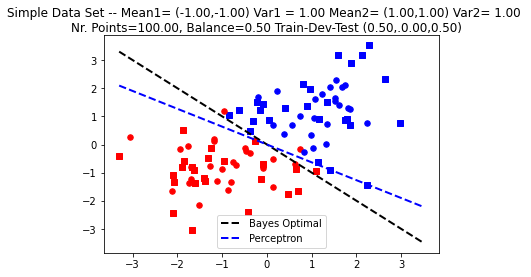

In [7]:
fig, axis = sd.plot_data("osx")
fig, axis = sd.add_line(fig, axis, params_perc_sd, "Perceptron", "blue")

Change the code to save the intermediate weight vectors, and plot them every five iterations. What do you observe?

[[-1.69314718 -1.69314718]
 [-1.          1.        ]
 [-1.          1.        ]]


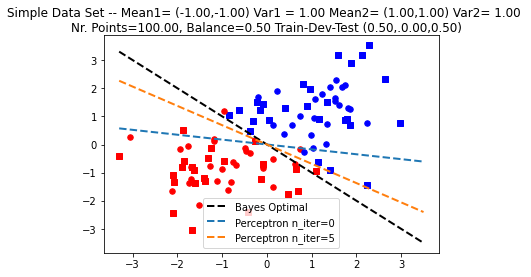

In [8]:
fig, axis = sd.plot_data("osx")
plot_stride = 5
for i, param in enumerate(perc.params_per_round[::plot_stride]):
    fig, axis = sd.add_line(fig, axis, param, f"Perceptron n_iter={i*plot_stride}", colour=None)

In [9]:
perc = percc.Perceptron()
acc_train, acc_test, params_classifier = run_classifier(scr, perc)
print("Perceptron Amazon Dataset Accuracy train: %f test: %f"%(acc_train, acc_test))

Rounds: 0 Accuracy: 0.870000
Rounds: 1 Accuracy: 0.940000
Rounds: 2 Accuracy: 0.979375
Rounds: 3 Accuracy: 0.965625
Rounds: 4 Accuracy: 0.989375
Rounds: 5 Accuracy: 0.996250
Rounds: 6 Accuracy: 0.995000
Rounds: 7 Accuracy: 0.999375
Rounds: 8 Accuracy: 0.996250
Rounds: 9 Accuracy: 0.998125
Perceptron Amazon Dataset Accuracy train: 0.998750 test: 0.825000


## Exercise 1.3
We provide an implementation of the MIRA algorithm. Compare it with the perceptron for various values of $\lambda$

In [10]:
import lxmls.classifiers.mira as mirac
mira = mirac.Mira()
lambdas = [0.1,1,10] #higher lamba seems to be better for scr dataset
for lambda_ in lambdas:

    mira.regularizer = lambda_
    print(f"Lambda = {lambda_}")
    acc_train, acc_test, params_mira_sd = run_classifier(sd, mira)
    print("Mira Simple Dataset Accuracy train: %f test: %f"%(acc_train, acc_test))
    fig, axis = sd.add_line(fig, axis, params_mira_sd, f"Mira lambda={lambda_}","green")

    acc_train, acc_test, params_mira_scr = run_classifier(scr, mira)
    print("Mira Simple Dataset Accuracy train: %f test: %f"%(acc_train, acc_test))
    print()

Lambda = 0.1
Rounds: 0 Accuracy: 0.940000
Rounds: 1 Accuracy: 0.940000
Rounds: 2 Accuracy: 0.940000
Rounds: 3 Accuracy: 0.960000
Rounds: 4 Accuracy: 0.980000
Rounds: 5 Accuracy: 1.000000
Rounds: 6 Accuracy: 1.000000
Rounds: 7 Accuracy: 1.000000
Rounds: 8 Accuracy: 1.000000
Rounds: 9 Accuracy: 1.000000
Mira Simple Dataset Accuracy train: 0.980000 test: 0.960000


c:\users\thoma\anaconda3\envs\lxmls2021\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\users\thoma\anaconda3\envs\lxmls2021\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Rounds: 0 Accuracy: 0.803125
Rounds: 1 Accuracy: 0.898125
Rounds: 2 Accuracy: 0.941250
Rounds: 3 Accuracy: 0.967500
Rounds: 4 Accuracy: 0.980625
Rounds: 5 Accuracy: 0.983125
Rounds: 6 Accuracy: 0.994375
Rounds: 7 Accuracy: 0.993750
Rounds: 8 Accuracy: 0.996250
Rounds: 9 Accuracy: 0.998125
Mira Simple Dataset Accuracy train: 0.979375 test: 0.757500

Lambda = 1
Rounds: 0 Accuracy: 0.980000
Rounds: 1 Accuracy: 0.940000
Rounds: 2 Accuracy: 0.940000
Rounds: 3 Accuracy: 0.980000
Rounds: 4 Accuracy: 0.980000
Rounds: 5 Accuracy: 0.940000
Rounds: 6 Accuracy: 0.920000
Rounds: 7 Accuracy: 0.940000
Rounds: 8 Accuracy: 1.000000
Rounds: 9 Accuracy: 1.000000
Mira Simple Dataset Accuracy train: 1.000000 test: 0.960000


c:\users\thoma\anaconda3\envs\lxmls2021\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Rounds: 0 Accuracy: 0.817500
Rounds: 1 Accuracy: 0.900625
Rounds: 2 Accuracy: 0.948750
Rounds: 3 Accuracy: 0.970625
Rounds: 4 Accuracy: 0.987500
Rounds: 5 Accuracy: 0.987500
Rounds: 6 Accuracy: 0.996875
Rounds: 7 Accuracy: 0.998125
Rounds: 8 Accuracy: 1.000000
Rounds: 9 Accuracy: 1.000000
Mira Simple Dataset Accuracy train: 0.990625 test: 0.785000

Lambda = 10
Rounds: 0 Accuracy: 0.920000
Rounds: 1 Accuracy: 1.000000
Rounds: 2 Accuracy: 1.000000
Rounds: 3 Accuracy: 1.000000
Rounds: 4 Accuracy: 1.000000
Rounds: 5 Accuracy: 1.000000
Rounds: 6 Accuracy: 1.000000
Rounds: 7 Accuracy: 1.000000
Rounds: 8 Accuracy: 1.000000
Rounds: 9 Accuracy: 1.000000
Mira Simple Dataset Accuracy train: 1.000000 test: 0.960000


c:\users\thoma\anaconda3\envs\lxmls2021\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Rounds: 0 Accuracy: 0.841250
Rounds: 1 Accuracy: 0.886250
Rounds: 2 Accuracy: 0.949375
Rounds: 3 Accuracy: 0.966875
Rounds: 4 Accuracy: 0.975625
Rounds: 5 Accuracy: 0.988125
Rounds: 6 Accuracy: 0.993125
Rounds: 7 Accuracy: 0.992500
Rounds: 8 Accuracy: 0.995625
Rounds: 9 Accuracy: 0.994375
Mira Simple Dataset Accuracy train: 0.997500 test: 0.820000



Compare the results achieved and separating hiperplanes found.

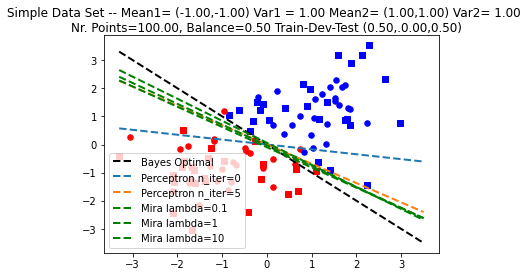

In [11]:
fig

## Exercise 1.4
We provide an implementation of the L-BFGS algorithm for training maximum entropy models in the class MaxEnt batch, as well as an implementation of the SGD algorithm in the class `MaxEnt online`.

In [12]:
import lxmls.classifiers.max_ent_batch as mebc
me_lbfgs = mebc.MaxEntBatch()
lambdas = [0.1,0.5,1,2,5] # smaller lambda work better on amazon
for lambda_ in lambdas:
    me_lbfgs.regularizer = lambda_
    print(f"Lambda = {lambda_}")

    acc_train, acc_test, params_meb_sd = run_classifier(sd, me_lbfgs)
    print(
        "Max-Ent batch Simple Dataset Accuracy train: %f test: %f" % 
        (acc_train,acc_test)
    )
    fig, axis = sd.add_line(fig, axis, params_meb_sd, f"Max-Ent-Batch, lambda={lambda_}","orange")
    
    acc_train, acc_test, params_meb_sd = run_classifier(scr, me_lbfgs)
    print(
        "Max-Ent Batch Amazon Sentiment Accuracy train: %f test: %f" % 
        (acc_train, acc_test)
    )
    print()

Lambda = 0.1
Objective = 0.6931471805599453
Objective = 0.24756124992764933
Objective = 0.2428282348185768
Objective = 0.23890544130873578
Objective = 0.23884079037258027
Objective = 0.23884022962529422
Max-Ent batch Simple Dataset Accuracy train: 0.980000 test: 0.960000
Objective = 0.6931471805599452
Objective = 1.9069935918850345
Objective = 0.6850296484629997
Objective = 0.6565572587035291
Objective = 0.6040589772811578
Objective = 0.560811187932441
Objective = 0.49368777287217747
Objective = 0.4691508270837687
Objective = 0.462501381015783
Objective = 0.45663871375617987
Objective = 0.4513182399214685
Objective = 0.4456987116368715
Objective = 0.44522901758472
Objective = 0.4433634662495137
Objective = 0.4431424612575181
Objective = 0.4429002623919738
Objective = 0.4432550830971149
Objective = 0.4428520740295594
Objective = 0.4428179814305574
Objective = 0.44278276121661964
Objective = 0.4427480845937839
Objective = 0.4427353795976709
Objective = 0.44273405855771597
Objective = 0.4

Train a maximum entropy model using L-BFGS, on the Amazon dataset (try different values of $\lambda$) and report training and test set accuracy. What do you observe?

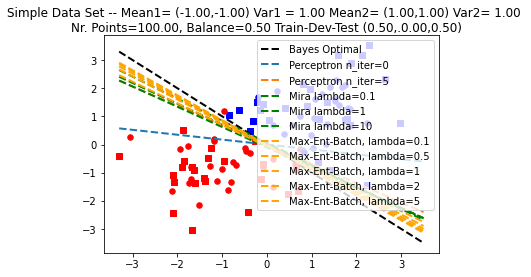

In [13]:
fig
# Max-Ent Batch Amazon Sentiment Accuracy train: 0.858125 test: 0.790000

Now, fix $\lambda$ = 1.0 and train with SGD (you might try to adjust the initial step). Compare the objective values obtained during training with those obtained with L-BFGS. What do you observe?

In [15]:
import lxmls.classifiers.max_ent_online as meoc
initial_steps = [0.1,1,10]
for initial_step in initial_steps:
    me_sgd = meoc.MaxEntOnline(initial_step = initial_step)

    me_sgd.regularizer = 1.0
    acc_train, acc_test, params_meo_scr = run_classifier(scr, me_sgd)

    print(
        "Max-Ent Online Amazon Sentiment Accuracy train: %f test: %f" % 
        (acc_train, acc_test)
    )

Epochs: 0 Objective: 1.637700
Epochs: 0 Accuracy: 0.610000
Epochs: 1 Objective: 1.295174
Epochs: 1 Accuracy: 0.626250
Epochs: 2 Objective: 1.213978
Epochs: 2 Accuracy: 0.640625
Epochs: 3 Objective: 1.167310
Epochs: 3 Accuracy: 0.645000
Epochs: 4 Objective: 1.135294
Epochs: 4 Accuracy: 0.655625
Epochs: 5 Objective: 1.111280
Epochs: 5 Accuracy: 0.662500
Epochs: 6 Objective: 1.092258
Epochs: 6 Accuracy: 0.666250
Epochs: 7 Objective: 1.076620
Epochs: 7 Accuracy: 0.667500
Epochs: 8 Objective: 1.063415
Epochs: 8 Accuracy: 0.670625
Epochs: 9 Objective: 1.052036
Epochs: 9 Accuracy: 0.671875
Max-Ent Online Amazon Sentiment Accuracy train: 0.671875 test: 0.655000
Epochs: 0 Objective: 1.449590
Epochs: 0 Accuracy: 0.846875
Epochs: 1 Objective: 0.643229
Epochs: 1 Accuracy: 0.858750
Epochs: 2 Objective: 0.633205
Epochs: 2 Accuracy: 0.859375
Epochs: 3 Objective: 0.629873
Epochs: 3 Accuracy: 0.860000
Epochs: 4 Objective: 0.628213
Epochs: 4 Accuracy: 0.860000
Epochs: 5 Objective: 0.627210
Epochs: 5 Acc

c:\users\thoma\documents\inria\lxmls-toolkit\lxmls\classifiers\max_ent_online.py:40: RuntimeWarning: overflow encountered in exp
  exp_scores = np.exp(scores)
c:\users\thoma\anaconda3\envs\lxmls2021\lib\site-packages\numpy\lib\scimath.py:272: RuntimeWarning: divide by zero encountered in log
  return nx.log(x)


Overflow: removing max
Overflow: removing max
Overflow: removing max
Overflow: removing max
Overflow: removing max
Overflow: removing max
Overflow: removing max
Epochs: 0 Objective: inf
Epochs: 0 Accuracy: 0.710000
Epochs: 1 Objective: 0.844693
Epochs: 1 Accuracy: 0.777500
Epochs: 2 Objective: 0.746015
Epochs: 2 Accuracy: 0.796250
Epochs: 3 Objective: 0.707012
Epochs: 3 Accuracy: 0.813750
Epochs: 4 Objective: 0.686069
Epochs: 4 Accuracy: 0.832500
Epochs: 5 Objective: 0.673323
Epochs: 5 Accuracy: 0.837500
Epochs: 6 Objective: 0.664743
Epochs: 6 Accuracy: 0.846250
Epochs: 7 Objective: 0.658579
Epochs: 7 Accuracy: 0.847500
Epochs: 8 Objective: 0.653940
Epochs: 8 Accuracy: 0.851250
Epochs: 9 Objective: 0.650326
Epochs: 9 Accuracy: 0.853125
Max-Ent Online Amazon Sentiment Accuracy train: 0.853125 test: 0.777500


## Exercise 1.5
Run the SVM primal algorithm. Then, repeat the MaxEnt exercise now using SVMs, for several values of $\lambda$:

In [16]:
import lxmls.classifiers.svm as svmc
svm = svmc.SVM()
svm.regularizer = 1.0 # This is lambda

acc_train, acc_test, params_svm_sd = run_classifier(sd, svm)
print("SVM Online Simple Dataset Accuracy train: {} test: {}".format(acc_train,acc_test))

Epochs: 0 Objective: 0.545698
Epochs: 0 Accuracy: 0.940000
Epochs: 1 Objective: 0.392799
Epochs: 1 Accuracy: 0.980000
Epochs: 2 Objective: 0.379019
Epochs: 2 Accuracy: 0.980000
Epochs: 3 Objective: 0.374794
Epochs: 3 Accuracy: 0.960000
Epochs: 4 Objective: 0.372746
Epochs: 4 Accuracy: 0.940000
Epochs: 5 Objective: 0.371416
Epochs: 5 Accuracy: 0.940000
Epochs: 6 Objective: 0.370676
Epochs: 6 Accuracy: 0.940000
Epochs: 7 Objective: 0.370046
Epochs: 7 Accuracy: 0.940000
Epochs: 8 Objective: 0.369570
Epochs: 8 Accuracy: 0.940000
Epochs: 9 Objective: 0.369198
Epochs: 9 Accuracy: 0.940000
SVM Online Simple Dataset Accuracy train: 0.94 test: 0.96


Compare the results achieved and separating hiperplanes found.

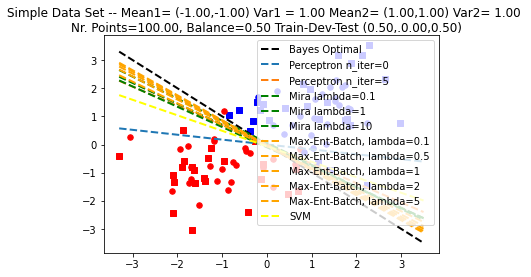

In [17]:
fig, axis = sd.add_line(fig, axis, params_svm_sd, "SVM", "yellow")
fig

In [18]:
run_classifier(scr, svm)
print("SVM Online Amazon Sentiment Accuracy train: {} test: {}".format(acc_train,acc_test))

Epochs: 0 Objective: 1.512689
Epochs: 0 Accuracy: 0.825000
Epochs: 1 Objective: 0.800713
Epochs: 1 Accuracy: 0.861250
Epochs: 2 Objective: 0.765247
Epochs: 2 Accuracy: 0.870625
Epochs: 3 Objective: 0.748420
Epochs: 3 Accuracy: 0.873750
Epochs: 4 Objective: 0.742675
Epochs: 4 Accuracy: 0.880000
Epochs: 5 Objective: 0.736711
Epochs: 5 Accuracy: 0.883125
Epochs: 6 Objective: 0.733872
Epochs: 6 Accuracy: 0.878750
Epochs: 7 Objective: 0.730902
Epochs: 7 Accuracy: 0.876875
Epochs: 8 Objective: 0.729642
Epochs: 8 Accuracy: 0.880625
Epochs: 9 Objective: 0.728029
Epochs: 9 Accuracy: 0.881875
SVM Online Amazon Sentiment Accuracy train: 0.94 test: 0.96


## Exercise 1.6

Using the simple dataset run the different algorithms varying some characteristics of the data: like
the number of points, variance (hence separability), class balance. Use function run all classifiers in file labs/run all classifiers.py which receives a dataset and plots all decisions boundaries and accuracies. What can you
say about the methods when the amount of data increases? What about when the classes become too unbalanced?


In [24]:
from lxmls.run_all_classifiers import run_all_classifiers

Number of points=100 variance=1 balance=0.1
[[-3.30258509 -1.10536052]
 [-1.          1.        ]
 [-1.          1.        ]]
Naive Bayes
[-3.04970237 -1.566638   -1.02588977  1.4273813  -1.30406784  1.26681297]
Accuracy train: 0.950000 test: 0.960000
Perceptron
Rounds: 0 Accuracy: 0.940000
Rounds: 1 Accuracy: 0.940000
Rounds: 2 Accuracy: 0.960000
Rounds: 3 Accuracy: 0.960000
Rounds: 4 Accuracy: 0.940000
Rounds: 5 Accuracy: 0.960000
Rounds: 6 Accuracy: 0.950000
Rounds: 7 Accuracy: 0.950000
Rounds: 8 Accuracy: 0.950000
Rounds: 9 Accuracy: 0.720000
[-0.7         0.7        -1.20931186  1.20931186 -1.62500314  1.62500314]
Accuracy train: 0.960000 test: 0.940000
MaxEnt LBFGS
Objective = 0.6931471805599453
Objective = 0.6742323535120174
Objective = 0.44600552737426696
Objective = 0.43596125314920736
Objective = 0.43532564054482664
Objective = 0.4353232542351082
Objective = 0.435323095836309
Objective = 0.43532308587496177
[-0.16003308  0.16003308 -0.2108792   0.2108792  -0.204179    0.20417

c:\users\thoma\anaconda3\envs\lxmls2021\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Rounds: 9 Accuracy: 0.930000
[-1.3         1.3        -2.59995207  2.59995207 -2.64365919  2.64365919]
Accuracy train: 0.970000 test: 0.960000
MaxEnt LBFGS
Objective = 0.6931471805599453
Objective = 0.6853171751018943
Objective = 0.45811170862143313
Objective = 0.44820516915442266
Objective = 0.44756870799407017
Objective = 0.4475669458880172
Objective = 0.447566942751299
Objective = 0.4475669423845734
[-0.12461658  0.12461658 -0.22836194  0.22836194 -0.20275569  0.20275569]
Accuracy train: 0.980000 test: 0.960000
MaxEnt Online
Epochs: 0 Objective: 0.466848
Epochs: 0 Accuracy: 0.980000
Epochs: 1 Objective: 0.448768
Epochs: 1 Accuracy: 0.980000
Epochs: 2 Objective: 0.448273
Epochs: 2 Accuracy: 0.980000
Epochs: 3 Objective: 0.448069
Epochs: 3 Accuracy: 0.980000
Epochs: 4 Objective: 0.447957
Epochs: 4 Accuracy: 0.980000
Epochs: 5 Objective: 0.447886
Epochs: 5 Accuracy: 0.980000
Epochs: 6 Objective: 0.447837
Epochs: 6 Accuracy: 0.980000
Epochs: 7 Objective: 0.447801
Epochs: 7 Accuracy: 0.9

c:\users\thoma\anaconda3\envs\lxmls2021\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Number of points=100 variance=1 balance=0.5
[[-1.69314718 -1.69314718]
 [-1.          1.        ]
 [-1.          1.        ]]
Naive Bayes
[-1.6995368  -1.79359516 -1.05930788  1.151148   -1.30426808  1.07633056]
Accuracy train: 0.920000 test: 0.880000
Perceptron
Rounds: 0 Accuracy: 0.920000
Rounds: 1 Accuracy: 0.930000
Rounds: 2 Accuracy: 0.840000
Rounds: 3 Accuracy: 0.920000
Rounds: 4 Accuracy: 0.930000
Rounds: 5 Accuracy: 0.830000
Rounds: 6 Accuracy: 0.910000
Rounds: 7 Accuracy: 0.930000
Rounds: 8 Accuracy: 0.910000
Rounds: 9 Accuracy: 0.930000
[-0.1         0.1        -1.15586361  1.15586361 -2.87064777  2.87064777]
Accuracy train: 0.920000 test: 0.860000
MaxEnt LBFGS
Objective = 0.6931471805599453
Objective = 0.7547711388894007
Objective = 0.49944870474395203
Objective = 0.4987455955494937
Objective = 0.49864348155744154
Objective = 0.4986434633279445
Objective = 0.4986434630763248
[ 0.0054931  -0.0054931  -0.19770353  0.19770353 -0.24068211  0.24068211]
Accuracy train: 0.930000 t

c:\users\thoma\anaconda3\envs\lxmls2021\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Epochs: 5 Objective: 0.428039
Epochs: 5 Accuracy: 0.930000
Epochs: 6 Objective: 0.427766
Epochs: 6 Accuracy: 0.930000
Epochs: 7 Objective: 0.427468
Epochs: 7 Accuracy: 0.930000
Epochs: 8 Objective: 0.427332
Epochs: 8 Accuracy: 0.930000
Epochs: 9 Objective: 0.427140
Epochs: 9 Accuracy: 0.930000
[ 0.015      -0.015      -0.18903109  0.18903109 -0.29046324  0.29046324]
Accuracy train: 0.930000 test: 0.880000



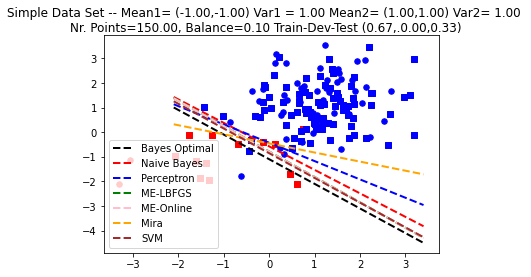

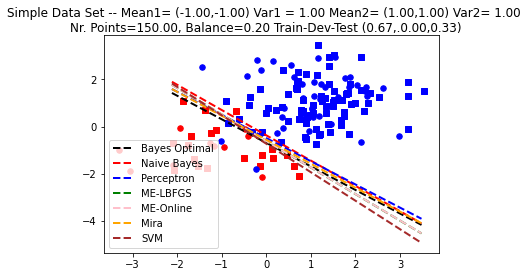

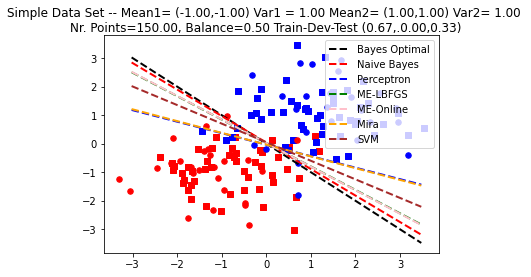

In [31]:
nb_of_pointss = [10, 100, 1000]
variances = [0.1, 1, 10]
class_unbalances = [0.1, 0.2, 0.5]

for nb_of_points in [100]:
    for variance in [1]:
        for class_unbalance in class_unbalances:
            print(f"Number of points={nb_of_points} variance={variance} balance={class_unbalance}")
            sd = sds.SimpleDataSet(
                nr_examples=nb_of_points + 50, # 50 points fo test
                g1=[[-1,-1],variance], 
                g2=[[1,1],variance], 
                balance=class_unbalance,
                split=[nb_of_points/(nb_of_points + 50),0,50/(nb_of_points + 50)]
            )
            run_all_classifiers(sd)
            print()

In [ ]:
# All models perform badle in high variance
# Models perform very well in low data regime.